***
### Import required Libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# train test 
from sklearn.model_selection import train_test_split

# for Random Forest
from sklearn.ensemble import RandomForestRegressor

# for performance matrix 
from sklearn.metrics import mean_squared_error, r2_score

# for selecting features based on importance weights
from sklearn.feature_selection import SelectFromModel

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# set the max columns to 55 
pd.set_option('display.max_columns',55)

### Load the Data into Pandas

In [3]:
# Load churn dataset into Pandas dataframe 

path = r"C:\Users\Abhishek\Desktop\D209\churn_clean.csv"

df_churn = pd.read_csv(path, index_col=1) 
df_churn.head()  

CaseOrder                           Interaction  \
Customer_id                                                    
K409198              1  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
S120509              2  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
K191035              3  344d114c-3736-4be5-98f7-c72c281e2d35   
D90850               4  abfa2b40-2d43-4994-b15a-989b8c79e311   
K662701              5  68a861fd-0d20-4e51-a587-8a90407ee574   

                                          UID         City State  \
Customer_id                                                        
K409198      e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
S120509      f2de8bef964785f41a2959829830fb8a  West Branch    MI   
K191035      f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
D90850       dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
K662701      aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                            County    Zip       Lat        Lng  Population  \
Customer_id                                                                  
K409198      Prince of Wales-Hyder  99927  56.25100 -133.37571          38   
S120509                     Ogemaw  48661  44.32893  -84.24080       10446   
K191035                    Yamhill  97148  45.35589 -123.24657        3735   
D90850                   San Diego  92014  32.96687 -117.24798       13863   
K662701                  Fort Bend  77461  29.38012  -95.80673       11352   

                 Area             TimeZone                                Job  \
Customer_id                                                                     
K409198         Urban        America/Sitka  Environmental health practitioner   
S120509         Urban      America/Detroit             Programmer, multimedia   
K191035         Urban  America/Los_Angeles            Chief Financial Officer   
D90850       Suburban  America/Los_Angeles                          Solicitor   
K662701      Suburban      America/Chicago                Medical illustrator   

             Children  Age    Income    Marital  Gender Churn  \
Customer_id                                                     
K409198             0   68  28561.99    Widowed    Male    No   
S120509             1   27  21704.77    Married  Female   Yes   
K191035             4   50   9609.57    Widowed  Female    No   
D90850              1   48  18925.23    Married    Male    No   
K662701             0   83  40074.19  Separated    Male   Yes   

             Outage_sec_perweek  Email  Contacts  Yearly_equip_failure Techie  \
Customer_id                                                                     
K409198                7.978323     10         0                     1     No   
S120509               11.699080     12         0                     1    Yes   
K191035               10.752800      9         0                     1    Yes   
D90850                14.913540     15         2                     0    Yes   
K662701                8.147417     16         2                     1     No   

                   Contract Port_modem Tablet InternetService Phone Multiple  \
Customer_id                                                                    
K409198            One year        Yes    Yes     Fiber Optic   Yes       No   
S120509      Month-to-month         No    Yes     Fiber Optic   Yes      Yes   
K191035            Two Year        Yes     No             DSL   Yes      Yes   
D90850             Two Year         No     No             DSL   Yes       No   
K662701      Month-to-month        Yes     No     Fiber Optic    No       No   

            OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
Customer_id                                                            
K409198                Yes          Yes               No          No   
S120509                Yes           No               No          No   
K191035                 No           No               No          No   
D90850                 Yes 

In [4]:
# Drop the variables which are not needed to answer the research question. 

df_churn.drop(columns=['CaseOrder', 'Lat','Lng', 'Interaction', 'UID', 'City', 'State', 'Zip', 
                       'Population', 'Job','Techie', 'Port_modem', 'Tablet', 'Marital',
                       'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'PaymentMethod','Email','Item1', 'Item2', 'Item3', 'Item4',    
                       'Item5', 'Item6', 'Item7', 'Item8', 'County', 'Area', 'TimeZone'],inplace=True)


In [5]:
# check for null 
print("Check for Nulls")
print("-"*100)
print(df_churn.isnull().any())

print("*"*100, '\n')

# check for missing values
print("Check for Missing Values")
print("-"*100)
print(df_churn.isna().any())

print("*"*100)
print("Dataframe Information :", '\n')
print(df_churn.info())

Check for Nulls
----------------------------------------------------------------------------------------------------
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Contacts                False
Yearly_equip_failure    False
Contract                False
InternetService         False
Multiple                False
PaperlessBilling        False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool
**************************************************************************************************** 

Check for Missing Values
----------------------------------------------------------------------------------------------------
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Contacts    

In [6]:
# copy the dataframe before making any changes for regression
df_churn_origional = df_churn
df_churn_origional.head()

Children  Age    Income  Gender Churn  Outage_sec_perweek  \
Customer_id                                                              
K409198             0   68  28561.99    Male    No            7.978323   
S120509             1   27  21704.77  Female   Yes           11.699080   
K191035             4   50   9609.57  Female    No           10.752800   
D90850              1   48  18925.23    Male    No           14.913540   
K662701             0   83  40074.19    Male   Yes            8.147417   

             Contacts  Yearly_equip_failure        Contract InternetService  \
Customer_id                                                                   
K409198             0                     1        One year     Fiber Optic   
S120509             0                     1  Month-to-month     Fiber Optic   
K191035             0                     1        Two Year             DSL   
D90850              2                     0        Two Year             DSL   
K662701             2                     1  Month-to-month     Fiber Optic   

            Multiple PaperlessBilling     Tenure  MonthlyCharge  \
Customer_id                                                       
K409198           No              Yes   6.795513     172.455519   
S120509          Yes              Yes   1.156681     242.632554   
K191035          Yes              Yes  15.754144     159.947583   
D90850            No              Yes  17.087227     119.956840   
K662701           No               No   1.670972     149.948316   

             Bandwidth_GB_Year  
Customer_id                     
K409198             904.536110  
S120509             800.982766  
K191035            2054.706961  
D90850             2164.579412  
K662701             271.493436

In [7]:
# get the summary
desc_df = df_churn.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

Children           Age         Income  Outage_sec_perweek  \
count   10000.000000  10000.000000   10000.000000        10000.000000   
mean        2.087700     53.078400   39806.926771           10.001848   
std         2.147200     20.698882   28199.916702            2.976019   
min         0.000000     18.000000     348.670000            0.099747   
25%         0.000000     35.000000   19224.717500            8.018214   
50%         1.000000     53.000000   33170.605000           10.018560   
75%         3.000000     71.000000   53246.170000           11.969485   
max        10.000000     89.000000  258900.700000           21.207230   
+3_std      8.529301    115.175045  124406.676876           18.929906   
-3_std     -4.353901     -9.018245  -44792.823334            1.073791   

            Contacts  Yearly_equip_failure        Tenure  MonthlyCharge  \
count   10000.000000          10000.000000  10000.000000   10000.000000   
mean        0.994200              0.398000     34.526188     172.624816   
std         0.988466              0.635953     26.443063      42.943094   
min         0.000000              0.000000      1.000259      79.978860   
25%         0.000000              0.000000      7.917694     139.979239   
50%         1.000000              0.000000     35.430507     167.484700   
75%         2.000000              1.000000     61.479795     200.734725   
max         7.000000              6.000000     71.999280     290.160419   
+3_std      3.959597              2.305860    113.855376     301.454099   
-3_std     -1.971197             -1.509860    -44.803000      43.795534   

        Bandwidth_GB_Year  
count        10000.000000  
mean          3392.341550  
std           2185.294852  
min            155.506715  
25%           1236.470827  
50%           3279.536903  
75%           5586.141370  
max           7158.981530  
+3_std        9948.226107  
-3_std       -3163.543008

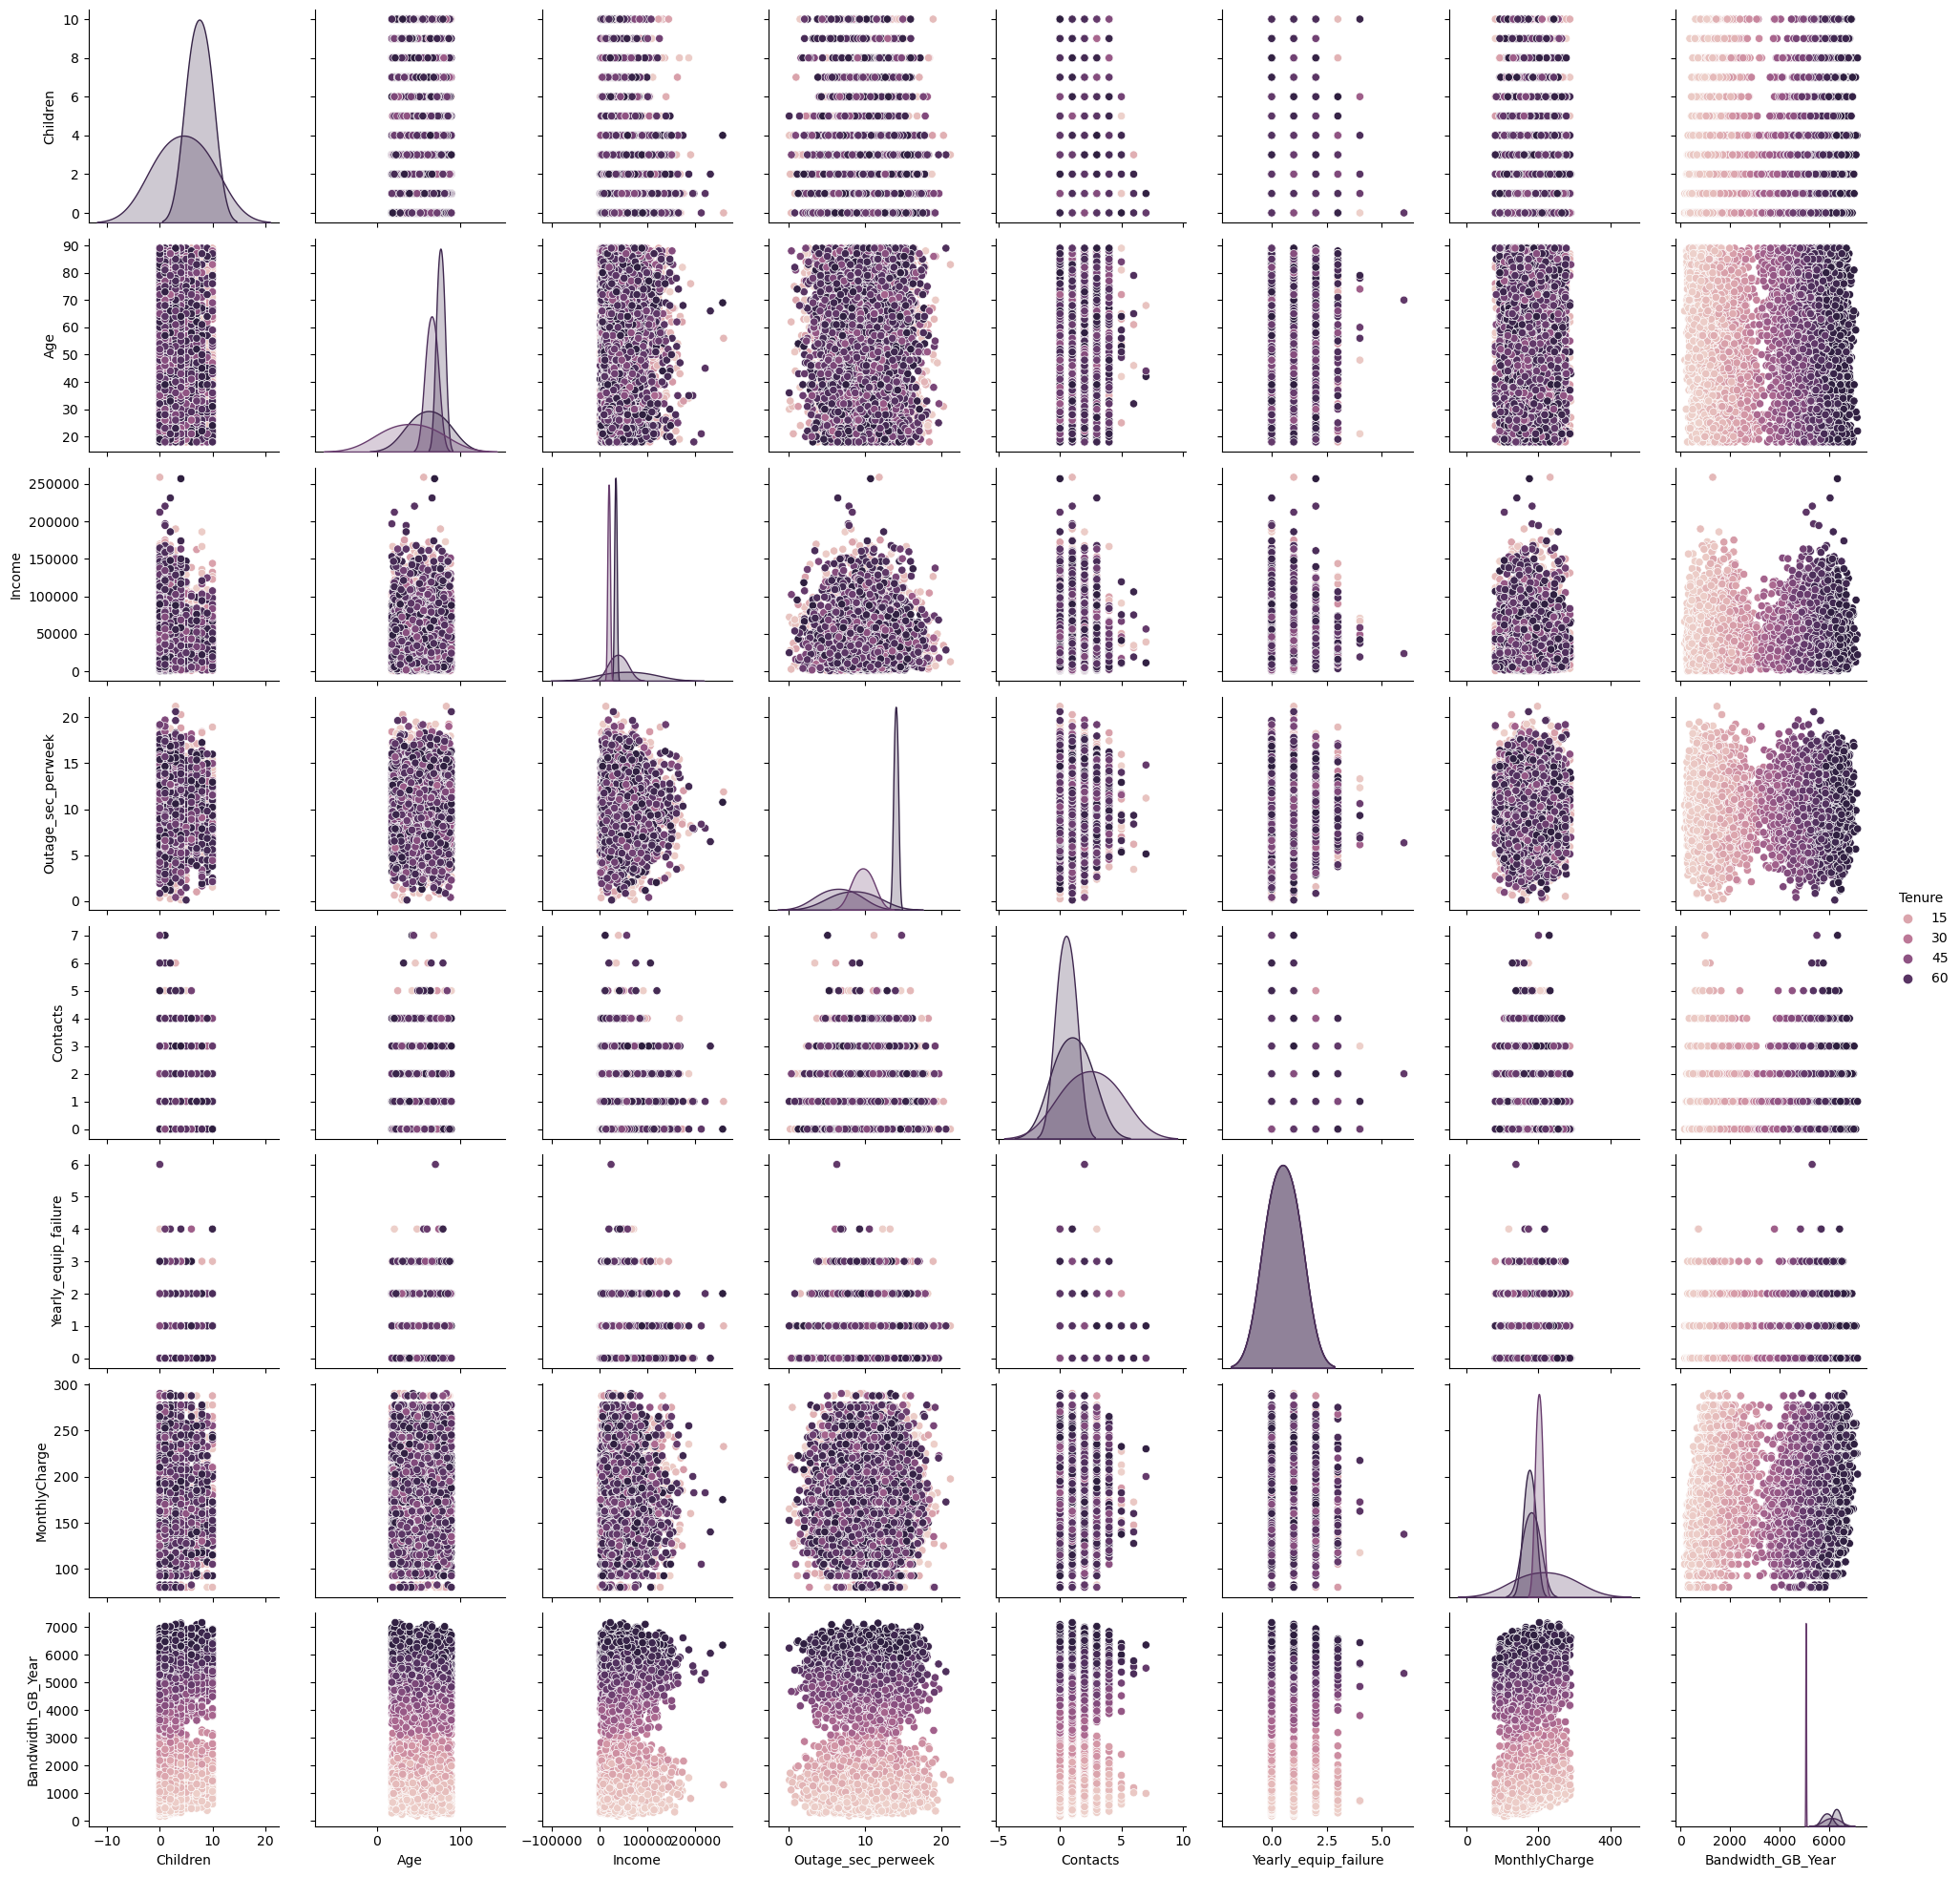

In [8]:
sns.pairplot(df_churn,hue='Tenure')

**The diagonal plots represent the distribution of each variable, while the plots on the off-diagonal represent the pairwise relationship between two variables.**

## Wrangle the data
- Contract
- InternetService
- Multiple
- PaperlessBilling
- Churn


References - https://pbpython.com/categorical-encoding.html


In [9]:
# Unique values for each categorical variable

print('-'*100)
print('Churn=', df_churn['Churn'].unique(), '\n')
print('Contract=', df_churn['Contract'].unique(), '\n')
print('InternetService=', df_churn['InternetService'].unique(), '\n')
print('Multiple=', df_churn['Multiple'].unique(), '\n')
print('PaperlessBilling=', df_churn['PaperlessBilling'].unique(), '\n')
print('Gender=', df_churn['Gender'].unique(), '\n')
print('-'*100)

----------------------------------------------------------------------------------------------------
Churn= ['No' 'Yes'] 

Contract= ['One year' 'Month-to-month' 'Two Year'] 

InternetService= ['Fiber Optic' 'DSL' 'None'] 

Multiple= ['No' 'Yes'] 

PaperlessBilling= ['Yes' 'No'] 

Gender= ['Male' 'Female' 'Nonbinary'] 

----------------------------------------------------------------------------------------------------


#### Churn, Multiple and PaperlessBilling

In [10]:
# Label encoding for Churn, multiple and PaperlessBilling variables 

cust_map = {"No": 0, "Yes": 1}         # Defining the mapping 

df_churn['Churn'] = df_churn['Churn'].map(cust_map)
df_churn['Multiple'] = df_churn['Multiple'].map(cust_map)
df_churn['PaperlessBilling'] = df_churn['PaperlessBilling'].map(cust_map)
df_churn.head()

Children  Age    Income  Gender  Churn  Outage_sec_perweek  \
Customer_id                                                               
K409198             0   68  28561.99    Male      0            7.978323   
S120509             1   27  21704.77  Female      1           11.699080   
K191035             4   50   9609.57  Female      0           10.752800   
D90850              1   48  18925.23    Male      0           14.913540   
K662701             0   83  40074.19    Male      1            8.147417   

             Contacts  Yearly_equip_failure        Contract InternetService  \
Customer_id                                                                   
K409198             0                     1        One year     Fiber Optic   
S120509             0                     1  Month-to-month     Fiber Optic   
K191035             0                     1        Two Year             DSL   
D90850              2                     0        Two Year             DSL   
K662701             2                     1  Month-to-month     Fiber Optic   

             Multiple  PaperlessBilling     Tenure  MonthlyCharge  \
Customer_id                                                         
K409198             0                 1   6.795513     172.455519   
S120509             1                 1   1.156681     242.632554   
K191035             1                 1  15.754144     159.947583   
D90850              0                 1  17.087227     119.956840   
K662701             0                 0   1.670972     149.948316   

             Bandwidth_GB_Year  
Customer_id                     
K409198             904.536110  
S120509             800.982766  
K191035            2054.706961  
D90850             2164.579412  
K662701             271.493436

#### Dummy values for - InternetService, Contract and Gender

References - https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [11]:
# Perform one-hot encoding
df_churn = pd.get_dummies(df_churn, columns=['InternetService', 'Contract', 'Gender'])

# Print the encoded DataFrame
df_churn.head()

Children  Age    Income  Churn  Outage_sec_perweek  Contacts  \
Customer_id                                                                 
K409198             0   68  28561.99      0            7.978323         0   
S120509             1   27  21704.77      1           11.699080         0   
K191035             4   50   9609.57      0           10.752800         0   
D90850              1   48  18925.23      0           14.913540         2   
K662701             0   83  40074.19      1            8.147417         2   

             Yearly_equip_failure  Multiple  PaperlessBilling     Tenure  \
Customer_id                                                                
K409198                         1         0                 1   6.795513   
S120509                         1         1                 1   1.156681   
K191035                         1         1                 1  15.754144   
D90850                          0         0                 1  17.087227   
K662701                         1         0                 0   1.670972   

             MonthlyCharge  Bandwidth_GB_Year  InternetService_DSL  \
Customer_id                                                          
K409198         172.455519         904.536110                    0   
S120509         242.632554         800.982766                    0   
K191035         159.947583        2054.706961                    1   
D90850          119.956840        2164.579412                    1   
K662701         149.948316         271.493436                    0   

             InternetService_Fiber Optic  InternetService_None  \
Customer_id                                                      
K409198                                1                     0   
S120509                                1                     0   
K191035                                0                     0   
D90850                                 0                     0   
K662701                                1                     0   

             Contract_Month-to-month  Contract_One year  Contract_Two Year  \
Customer_id                                                                  
K409198                            0                  1                  0   
S120509                            1                  0                  0   
K191035                            0                  0                  1   
D90850                             0                  0                  1   
K662701                            1                  0                  0   

             Gender_Female  Gender_Male  Gender_Nonbinary  
Customer_id                                                
K409198                  0            1                 0  
S120509                  1            0                 0  
K191035                  1            0                 0  
D90850                   0            1                 0  
K662701                  0            1                 0

In [12]:
df_churn.dtypes

Children                         int64
Age                              int64
Income                         float64
Churn                            int64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
InternetService_DSL              uint8
InternetService_Fiber Optic      uint8
InternetService_None             uint8
Contract_Month-to-month          uint8
Contract_One year                uint8
Contract_Two Year                uint8
Gender_Female                    uint8
Gender_Male                      uint8
Gender_Nonbinary                 uint8
dtype: object

#### Convert uint8 to int format 

To convert multiple columns of uint8 values to int values in a Pandas DataFrame we can use applymap() method to apply the astype() function to each element in the DataFrame. 

In [13]:
# convert uint8 columns to int
df_churn = df_churn.applymap(lambda x: int(x) if isinstance(x, int) else x)
print(df_churn.dtypes)

Children                         int64
Age                              int64
Income                         float64
Churn                            int64
Outage_sec_perweek             float64
Contacts                         int64
Yearly_equip_failure             int64
Multiple                         int64
PaperlessBilling                 int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
InternetService_DSL              int64
InternetService_Fiber Optic      int64
InternetService_None             int64
Contract_Month-to-month          int64
Contract_One year                int64
Contract_Two Year                int64
Gender_Female                    int64
Gender_Male                      int64
Gender_Nonbinary                 int64
dtype: object


### Prepared Dataset

Reference - https://www.geeksforgeeks.org/working-csv-files-python/

In [14]:
# Extract the clean data in CSV format 
df_churn.to_csv('Churn_prepared.csv')

### Build the model 

Reference -https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [15]:
# Define the dependent variable (y) and independent variables (X)
y = df_churn['Tenure']
X = df_churn.drop(columns=['Tenure'])      

print(y.head())
print('*'*100)
print(X.head())

Customer_id
K409198     6.795513
S120509     1.156681
K191035    15.754144
D90850     17.087227
K662701     1.670972
Name: Tenure, dtype: float64
****************************************************************************************************
             Children  Age    Income  Churn  Outage_sec_perweek  Contacts  \
Customer_id                                                                 
K409198             0   68  28561.99      0            7.978323         0   
S120509             1   27  21704.77      1           11.699080         0   
K191035             4   50   9609.57      0           10.752800         0   
D90850              1   48  18925.23      0           14.913540         2   
K662701             0   83  40074.19      1            8.147417         2   

             Yearly_equip_failure  Multiple  PaperlessBilling  MonthlyCharge  \
Customer_id                                                                    
K409198                         1         0          

In [16]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
X_train

Children  Age    Income  Churn  Outage_sec_perweek  Contacts  \
Customer_id                                                                 
I116479             1   83   3945.76      0            2.607278         0   
V52316              2   76  51864.36      0           14.326420         1   
C152580             1   38   8461.79      1            8.458739         1   
D189112             7   38  15693.44      0            5.307312         2   
F240900             0   54  23956.91      1           17.392136         1   
...               ...  ...       ...    ...                 ...       ...   
Z842961             1   82  87407.60      0            9.934332         2   
I590530             2   69  55365.37      1           11.137960         1   
Q14524              2   69  38594.93      1           10.221770         2   
O930073             1   48   4282.41      0           12.230660         0   
H813222             1   55  33541.35      0            8.884712         2   

             Yearly_equip_failure  Multiple  PaperlessBilling  MonthlyCharge  \
Customer_id                                                                    
I116479                         0         1                 1     222.632600   
V52316                          0         0                 1     207.609400   
C152580                         0         1                 0     220.114900   
D189112                         0         0                 1     187.642200   
F240900                         0         0                 1     182.446995   
...                           ...       ...               ...            ...   
Z842961                         1         1                 1     192.470500   
I590530                         2         0                 0     114.950900   
Q14524                          1         1                 1     267.664700   
O930073                         1         0                 1     139.934900   
H813222                         1         1                 1     192.488500   

             Bandwidth_GB_Year  InternetService_DSL  \
Customer_id                                           
I116479            6450.350560                    1   
V52316             5005.866114                    0   
C152580            1934.182617                    1   
D189112            6496.792308                    0   
F240900             764.241926                    0   
...                        ...                  ...   
Z842961            5890.196741                    0   
I590530            1454.178463                    1   
Q14524             1736.701740                    0   
O930073            4000.266344                    1   
H813222            1262.191241                    0   

             InternetService_Fiber Optic  InternetService_None  \
Customer_id                                                      
I116479                                0                     0   
V52316                                 1                     0   
C152580                                0                     0   
D189112                                0                     1   
F240900                                1                     0   
...                                  ...                   ...   
Z842961                                1                     0   
I590530                                0                     0   
Q14524                                 1                     0   
O930073                                0                     0   
H813222                                1                     0   

             Contract_Month-to-month  Contract_One year  Contract_Two Year  \
Customer_id                                                                  
I116479                            1                  0                  0   
V52316                             0                  1                  0   
C152580                            1                  0                  0   
D1891

In [18]:
X_test

Children  Age    Income  Churn  Outage_sec_perweek  Contacts  \
Customer_id                                                                 
Z710444             0   59  46489.09      0           10.261420         0   
N843105             0   22  33543.36      0           11.086574         0   
Z365104             3   83   6377.91      1            6.152569         4   
W959493             5   24  53611.13      0           10.636570         2   
P94424              6   32  31534.30      1           16.883790         1   
...               ...  ...       ...    ...                 ...       ...   
B586243             0   84  14547.90      0           13.315285         0   
B269098             3   82  45288.02      1           12.230700         0   
W25766              2   78   9901.54      1           10.139900         0   
A784083             2   72  20465.98      1           10.108860         1   
Q640899             1   20  71675.09      0           12.553390         2   

             Yearly_equip_failure  Multiple  PaperlessBilling  MonthlyCharge  \
Customer_id                                                                    
Z710444                         0         0                 1     197.487600   
N843105                         1         1                 0     144.960655   
Z365104                         0         0                 1     200.132300   
W959493                         2         0                 1     184.964700   
P94424                          0         1                 1     222.679200   
...                           ...       ...               ...            ...   
B586243                         1         1                 1     124.960655   
B269098                         2         1                 1     169.967100   
W25766                          1         1                 1     172.462400   
A784083                         1         0                 1     127.475000   
Q640899                         1         1                 1     219.990200   

             Bandwidth_GB_Year  InternetService_DSL  \
Customer_id                                           
Z710444            5570.114970                    0   
N843105             545.183277                    0   
Z365104            1432.922873                    1   
W959493            6294.155657                    0   
P94424             1040.201495                    0   
...                        ...                  ...   
B586243             565.457794                    1   
B269098            1393.130581                    0   
W25766             5978.105413                    0   
A784083             825.648553                    0   
Q640899            5464.935804                    0   

             InternetService_Fiber Optic  InternetService_None  \
Customer_id                                                      
Z710444                                1                     0   
N843105                                1                     0   
Z365104                                0                     0   
W959493                                1                     0   
P94424                                 0                     1   
...                                  ...                   ...   
B586243                                0                     0   
B269098                                0                     1   
W25766                                 1                     0   
A784083                                0                     1   
Q640899                                1                     0   

             Contract_Month-to-month  Contract_One year  Contract_Two Year  \
Customer_id                                                                  
Z710444                            1                  0                  0   
N843105                            0                  0                  1   
Z365104                            0                  1                  0   
W9594

In [19]:
print('X_train length =', len(X_train))
print('X_test length =', len(X_test), '\n')

X_train length = 8000
X_test length = 2000 



In [20]:
# Extract the training and testing data in CSV format 
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

### Import RandomForestRegressor and fit the data

In Random Forest, n_estimators is a hyperparameter that represents the number of decision trees to be used in the ensemble.

The default value for n_estimators in scikit-learn is 100. 

Random_state is set to specific value (e.g., 42) so that the results of the model will be the same every time i run the code with the same random_state value. 

In [21]:
## Create a Random Forest regressor with default hyperparameters
rf_model = RandomForestRegressor(random_state=42)

# fit to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Make Training predictions 
y_train_pred = rf_model.predict(X_train)
y_train_pred

array([66.5072815 , 55.4591356 , 10.55175431, ..., 12.58060824,
       40.0512448 , 10.73216793])

In [23]:
# Compute Initial model performance measures with training 

mse_train_init = mean_squared_error(y_train, y_train_pred)
rmse_train_init = mse_train_init ** (1/2)
r2_train_init = r2_score(y_train, y_train_pred)

print("Initial Model : Training Mean Squared Error (MSE):",  round(mse_train_init,3))
print("Initial Model : Training - Root Mean Squared Error (RMSE): ", round(rmse_train_init,3))
print("Initial Model : Training - R-squared (R2 ) :",  r2_train_init)

Initial Model : Training Mean Squared Error (MSE): 0.177
Initial Model : Training - Root Mean Squared Error (RMSE):  0.421
Initial Model : Training - R-squared (R2 ) : 0.999746017414182


In [24]:
# Make predictions on the testing data
y_pred_init = rf_model.predict(X_test)

# Calculate mean squared error (MSE) and R-squared (R2) score
mse_init = mean_squared_error(y_test, y_pred_init)
rmse_init = mse_init ** (1/2)
r2_init = r2_score(y_test, y_pred_init)

print("Initial Model : Testing Mean Squared Error (MSE):",  round(mse_init,3))
print("Initial Model : Testing - Root Mean Squared Error (RMSE): ", round(rmse_init,3))
print("Initial Model : Testing - R-squared (R2 ) :",  r2_init)

Initial Model : Testing Mean Squared Error (MSE): 1.292
Initial Model : Testing - Root Mean Squared Error (RMSE):  1.137
Initial Model : Testing - R-squared (R2 ) : 0.9981693628262789


### Find important features with Random Forest model

In [25]:
# Get feature importance scores
importances = rf_model.feature_importances_

In [26]:
# view the feature scores
feature_scores = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
feature_scores

Bandwidth_GB_Year              0.988684
InternetService_DSL            0.004721
MonthlyCharge                  0.004174
Age                            0.000859
Children                       0.000612
Income                         0.000222
Outage_sec_perweek             0.000214
Contacts                       0.000075
Gender_Male                    0.000060
Gender_Female                  0.000051
InternetService_Fiber Optic    0.000050
InternetService_None           0.000045
Multiple                       0.000042
Yearly_equip_failure           0.000040
Churn                          0.000040
PaperlessBilling               0.000032
Contract_Month-to-month        0.000028
Contract_Two Year              0.000025
Contract_One year              0.000022
Gender_Nonbinary               0.000004
dtype: float64

### Hyperparameter tuning 

Reference - 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html


In [27]:
# Set up hyperparameter tuning grid
param_grid = {'n_estimators': [50, 100, 200]}

In [28]:
# Set up Random Forest model for hyperparameter tuning
rf_model_tuned = RandomForestRegressor(random_state=42)

In [29]:
# Set up GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='neg_mean_squared_error')

scikit-learn's GridSearchCV() function minimizes the scoring function, so we need to negate the MSE using the neg_mean_squared_error scoring function. This means that a higher score (i.e., less negative) is better, and the function will try to find the hyperparameters that minimize the negative mean squared error.

In [30]:
# Fit GridSearchCV object to training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [31]:
# Print best hyperparameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_estimators': 200}
Best score:  -1.3314652938742175


**Result :** The Best score of -1.3314 means that the model has a mean squared error of 1.3314 on the validation set. Since this is a negative score, it indicates that the lower the value, the better the performance of the model. 

### Performance matrix 

In [32]:
# Make predictions using the tuned Random Forest model on the test data
y_pred = grid_search.predict(X_test)
y_pred

array([63.4166563 ,  2.52709204,  5.85919982, ..., 69.8984307 ,
        8.00967775, 58.8272146 ])

In [33]:
# Make Training predictions 
y_train_pred = grid_search.predict(X_train)
y_train_pred

array([66.564486  , 55.48039085, 10.65619734, ..., 12.53809719,
       39.98927295, 10.7228646 ])

In [34]:
# Compute model performance measures with training 

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** (1/2)
r2_train = r2_score(y_train, y_train_pred)

print("Final Model : Training Mean Squared Error (MSE):",  round(mse_train,3))
print("Final Model : Training - Root Mean Squared Error (RMSE): ", round(rmse_train,3))
print("Final Model : Training - R-squared (R2 ) :",  r2_train)

Final Model : Training Mean Squared Error (MSE): 0.172
Final Model : Training - Root Mean Squared Error (RMSE):  0.415
Final Model : Training - R-squared (R2 ) : 0.999753286214838


In [35]:
# Compute model performance measures - Testing 
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** (1/2)
r2 = r2_score(y_test, y_pred)

In [36]:
# Print model performance measures
print("Final Model : Testing - Mean Squared Error (MSE): ", round(mse,3))
print("Final Model : Testing - Root Mean Squared Error (RMSE): ", round(rmse,3))
print("Final Model : Testing - R-squared (R2 ): ", r2)

Final Model : Testing - Mean Squared Error (MSE):  1.274
Final Model : Testing - Root Mean Squared Error (RMSE):  1.129
Final Model : Testing - R-squared (R2 ):  0.9981940234016548


Both RMSE and MSE can show if the degree of error is significant in the model. 


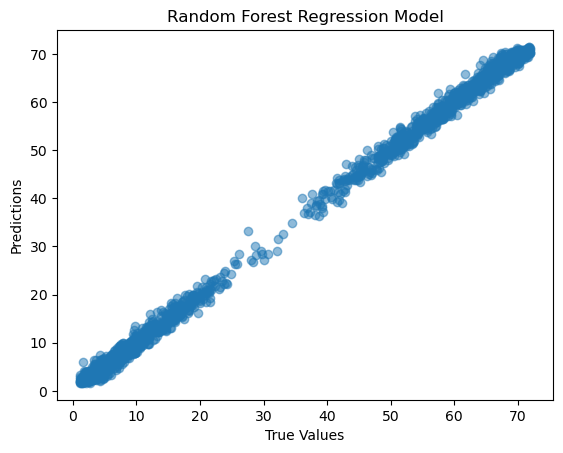

In [37]:
# Create a scatter plot of predicted vs true values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression Model')
plt.show()

**Result :** The Scatter plot shows a tight cluster of points around the straight line which indicates that the model is accurately predicting the values.

In [38]:
# Calculate residuals
residuals = y_test - y_pred

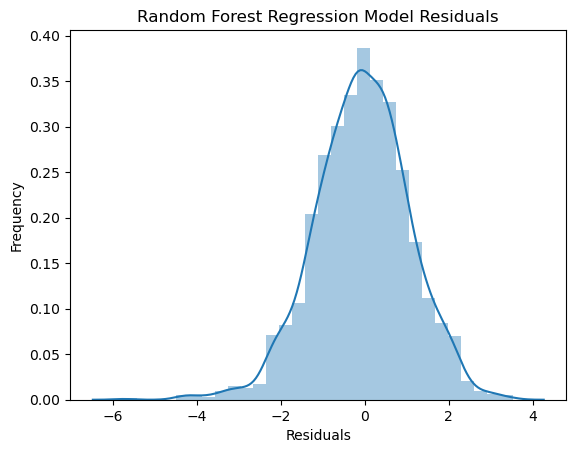

In [39]:
# Create a distribution plot of residuals
sns.distplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Regression Model Residuals')
plt.show()

**Result :** The residuals are randomly distributed around zero with no discernible pattern which indicates that the model is accurately capturing the information in the data and making unbiased predictions.

### Plot the random forest decision tree

In [40]:
from sklearn.tree import plot_tree

In [41]:
# Get the first estimator from the best random forest model
rf = grid_search.best_estimator_.estimators_[0]

# Plot the decision tree with max_depth=3
plt.figure(figsize=(60,25),dpi=300)
plot_tree(rf, max_depth=3, feature_names=X_train.columns, fontsize=25, filled=True)
plt.show()

**Note :** In the above code I am using the filterwarnings function from the warnings module to suppress any warning that matches the FutureWarning category. This will silence the warning message for the entire program.